In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#the code below replaces the our graphs with those from seaborn
sns.set()

In [106]:
#load the data
raw_data = pd.read_csv('/content/drive/MyDrive/salary.csv')

#we create a copy of the raw_data before making any alterations to the original dataset
data = raw_data.copy()

#view the first five data 
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [107]:
#check if there are missing entries in the dataset, check for count and whether the value tallies
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [108]:
#check if there are missing values on any of the columns and their data type
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


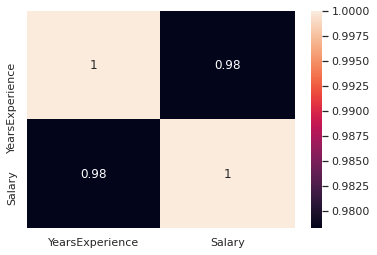

In [110]:
viz=sns.heatmap(data[['YearsExperience','Salary']].corr(),annot=True)

In [111]:
#set the independent and dependent variables
x1 = data['YearsExperience']
y = data['Salary']

#add a constant to x 
x = sm.add_constant(x1)
print(x.shape)
print(y.shape)

(30, 2)
(30,)


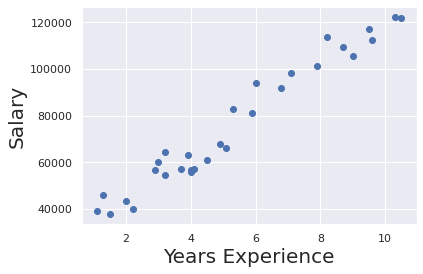

In [112]:
#extra
#check the scatter plot of the dataset 
plt.scatter(x1,y)
plt.xlabel('Years Experience',fontsize='20')
plt.ylabel('Salary',fontsize='20')

plt.show()

In [113]:
#now we shall perfom the linear regression
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        19:10:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

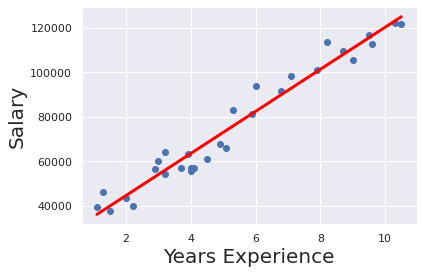

In [114]:
#extra
#let us plot the regression line on the scatter plot we made by first plotting the scatter
plt.scatter(x1,y)
plt.xlabel('Years Experience',fontsize='20')
plt.ylabel('Salary',fontsize='20')

#define the linear regression model
yhat = 9449.9623*x1 + 2.579e+04

#plot the linear regression model
fig=plt.plot(x1,yhat, lw='3', c='red',label='regression line')

plt.show()

In [115]:
pred = results.predict([[1.0,5.1]])
print(pred)

[73987.00803809]


In [116]:
results.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [117]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.955     
Dependent Variable:   Salary             AIC:                  606.8823  
Date:                 2021-04-22 19:10   BIC:                  609.6847  
No. Observations:     30                 Log-Likelihood:       -301.44   
Df Model:             1                  F-statistic:          622.5     
Df Residuals:         28                 Prob (F-statistic):   1.14e-20  
R-squared:            0.957              Scale:                3.3505e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           25792.2002 2273.0534 11.3469 0.0000 21136.0613 30448.3391
YearsExperience  9449.9623  378.7546 24.9501 0.0000  8674.1187 10225.8059
-------------------------------------------------------------------------
Omnibus:                  2.140          Durbin-Watson:             1.648
Prob(Omnibus):            0.343          Jarque-Bera (JB):          1.569
Skew:                     0.363          Prob(JB):                  0.456
Kurtosis:                 2.147          Condition No.:             13   
=========================================================================

"""

In [118]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [119]:
X = data.iloc[:,:-1]
y = data.iloc[:,1]

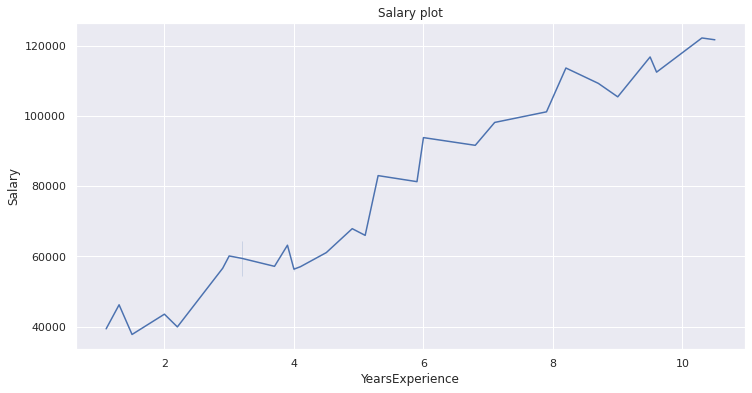

In [120]:
#extra
p = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.figure(figsize=(12,6))
plt.title("Salary plot")

sns.lineplot(data=data,x=data.YearsExperience,y=data.Salary,palette=p)

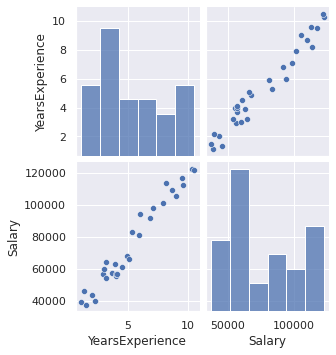

In [121]:
#extra
sns.pairplot(data)


In [122]:
from sklearn.model_selection import train_test_split


In [123]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 40 )


In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [125]:
lr.fit(X_train,y_train)
pred2 = lr.predict(X_test)

In [126]:
lr.score(X_train,y_train)


0.9634588749068316

In [127]:
lr.predict([[4.0]])

array([64773.83161624])

Text(0.5, 1.0, 'Years vs Salary')

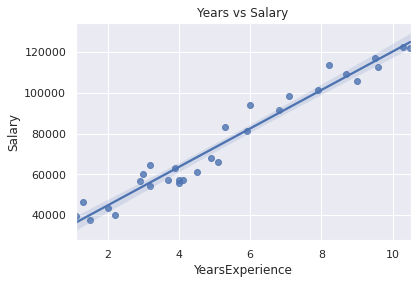

In [128]:
#extra
sns.regplot(x=X,y=y).set_title("Years vs Salary")


In [129]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,pred2))
print(metrics.mean_absolute_error(y_test,pred2))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

44024061.33808143
5822.33272305098
6635.063024424217


Text(0.5, 1.0, 'prediction of data')

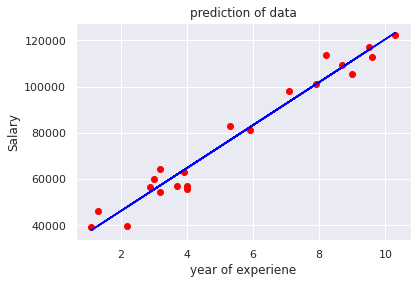

In [130]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, lr.predict(X_train), color ='blue')
plt.xlabel('year of experiene')
plt.ylabel('Salary')
plt.title('prediction of data')

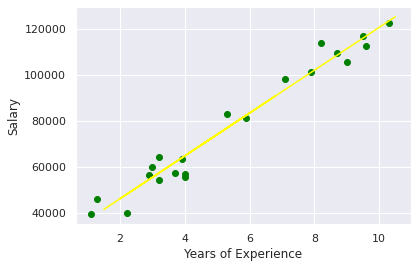

In [131]:
plt.scatter(X_train, y_train, color = 'green') 
plt.plot(X_test, lr.predict(X_test), color = 'yellow')  
plt.xlabel('Years of Experience') 
plt.ylabel('Salary') 
plt.show()

In [132]:
data = {'YearsExperience':[1.1, 1.3, 1.5, 2.0 , 2.2, 2.9, 3.0 , 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.0], 'Salary':[ 39343.0, 46205.0, 37731.0, 43525.0, 39891.0, 56642.0, 60150.0, 61111.0, 67938.0, 66029.0, 83088.0, 81363.0,54445.0, 64445.0, 57189.0, 63218.0, 55794.0]}
dataframe = pd.DataFrame(data) 
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [133]:

xs=dataframe.drop(['Salary'],axis=1)  
y=dataframe['Salary']
print(xs)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.0


In [134]:

model=LinearRegression()
model.fit(xs,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
model.coef_


array([7402.53559239])

In [136]:
model.intercept_


33804.04765967822

In [137]:
x_new=[[4.9]]
y_pred=model.predict(x_new)
print(y_pred)

[70076.47206241]


In [138]:
df=pd.read_csv("/content/drive/MyDrive/insurances.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [139]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [140]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [141]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Multiple Linear Regession

In [142]:
#diving data into indendpend varible and the traget variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [143]:
x.head()


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [144]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [145]:
#spliting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [147]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [148]:
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
model.coef_


array([ 3997.48908027,   233.77791228,  1550.32902849,   677.15558628,
       10068.87905272,   -77.39449441])

In [150]:
model.intercept_


13744.355613129495

In [151]:
model.predict([[39,0,28.870,5,0,2]])


array([217635.41773859])

In [152]:
model.predict([[60,1,39.900,0,1,3]])


array([325522.30214761])

In [153]:
model.score(x_test,y_test)


0.7454198242881949

# From Scratch

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

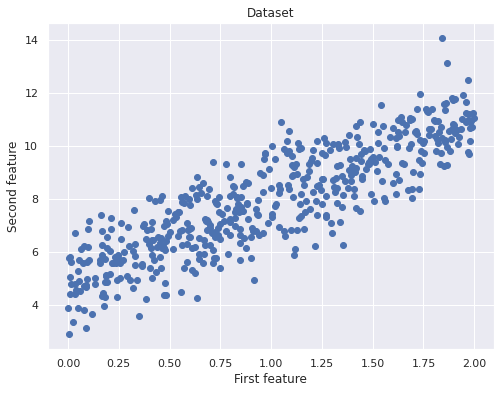

In [155]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [156]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [157]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.2084346146095934
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467


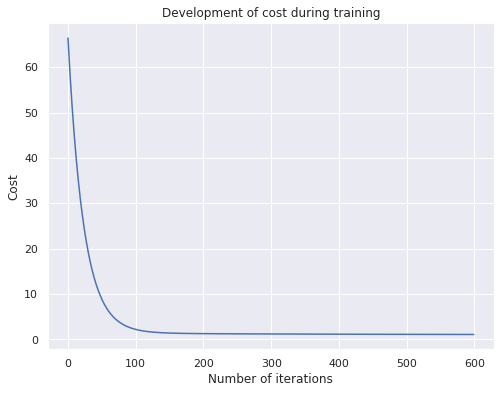

In [158]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [159]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.0955
Error on test set: 1.0


In [160]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

In [161]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 1.0228
Error on test set: 1.0432


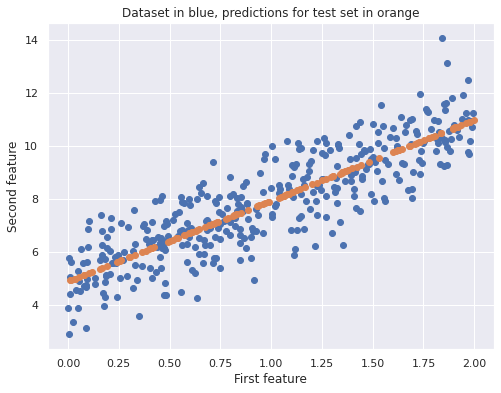

In [162]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()